In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('yahoo_finance/ETFs.csv')
df2 = pd.read_csv('yahoo_finance/MutualFunds.csv')

In [8]:
df2.esg_score.head(20)

0     22.46
1     27.05
2       NaN
3     20.55
4       NaN
5     23.10
6       NaN
7       NaN
8       NaN
9       NaN
10    24.01
11      NaN
12    22.46
13    22.46
14    23.10
15    22.46
16      NaN
17    23.10
18    22.46
19    22.46
Name: esg_score, dtype: float64

SQL in python

In [6]:
#Import needed packages
import sqlalchemy
import sql_functions as sf
import pandas as pd
import numpy as np

In [5]:
#Define the schema and get the mutual_funds_subset table from the schema
# schema = 'cgn_analytics_23_2'
schema = 'capstone_esg_investment'
mf_df = sf.get_dataframe(f'SELECT * FROM {schema}."mutual_funds_subset"')
mf_df.head()


,fund_symbol,fund_short_name,fund_long_name,fund_category,fund_family,total_net_assets,year_to_date_return,day200_moving_average,week52_high_low_change_perc,morningstar_overall_rating,...,fund_sector_consumer_cyclical,fund_sector_consumer_defensive,fund_sector_energy,fund_sector_financial_services,fund_sector_healthcare,fund_sector_industrials,fund_sector_real_estate,fund_sector_technology,fund_sector_utilities,financial_score
0,AAAAX,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,World Allocation,DWS,2.979347e+09,0.21026,12.369,0.18683,3.0,...,0.0190,0.0293,0.1852,0.0000,0.0000,0.1413,0.3520,0.0012,0.1025,12.6
1,AAAEX,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,Health,Virtus,1.953489e+08,0.19077,38.650,0.20256,3.0,...,0.0034,0.0000,0.0000,0.0000,0.9598,0.0000,0.0000,0.0000,0.0000,35.4
2,AAAFX,None,American Century One Choice Blend+ 2015 Portfo...,Target-Date 2015,American Century Investments,2.594600e+04,NaN,10.392,0.07096,NaN,...,0.1184,0.0822,0.0355,0.1679,0.1342,0.1277,0.0376,0.1696,0.0258,NaN
3,AAAGX,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,Large Growth,Thrivent Funds,2.078607e+09,0.24559,17.294,0.23955,4.0,...,0.1957,0.0046,0.0000,0.1458,0.1326,0.0346,0.0000,0.3250,0.0000,42.0
4,AAAHX,None,American Century One Choice Blend+ 2015 Portfo...,Target-Date 2015,American Century Investments,2.594600e+04,NaN,10.398,0.07183,NaN,...,0.1184,0.0822,0.0355,0.1679,0.1342,0.1277,0.0376,0.1696,0.0258,NaN


In [20]:
# leader = np.arange(7.143, 10.000)
# average = np.arange(2.857, 7.143)
# laggard = np.arange(0.000, 2.857)

#New dataframe with selected variables
ddf = mf_df[['fund_symbol','fund_long_name','inception_date','size_type','esg_score','financial_score']]

#A query to group the ESG scores on performance
leader = ddf.query("esg_score>=7.143<=10.000")
average = ddf.query("esg_score>=2.857<=7.143")
laggard = ddf.query("esg_score>=0.000<=2.857")

leader

,fund_symbol,fund_long_name,inception_date,size_type,esg_score,financial_score
0,AAAAX,DWS RREEF Real Assets Fund - Class A,2007-07-30,Large,22.46,12.6
1,AAAEX,Virtus AllianzGI Health Sciences Fund Class P,2020-07-13,Large,27.05,35.4
3,AAAGX,Thrivent Large Cap Growth Fund Class A,1999-10-29,Large,20.55,42.0
5,AAAIX,American Century Strategic Allocation: Aggress...,2000-08-01,Large,23.10,26.1
10,AAANX,Horizon Active Asset Allocation Fund Investor ...,2012-01-31,Large,24.01,NaN
...,...,...,...,...,...,...
23777,ZVNBX,Fidelity Convertible Securities Fund,2015-08-31,Large,23.48,NaN
23778,ZVNIX,Fidelity Advisor Small Cap Value Fund Class M,2015-08-31,Large,23.48,NaN
23779,VHYAX,American Funds Capital World Bond Fund Class 5...,2019-02-07,Large,24.95,33.3
23780,VIAAX,American Funds Capital World Growth and Income...,2016-03-02,Large,20.98,NaN


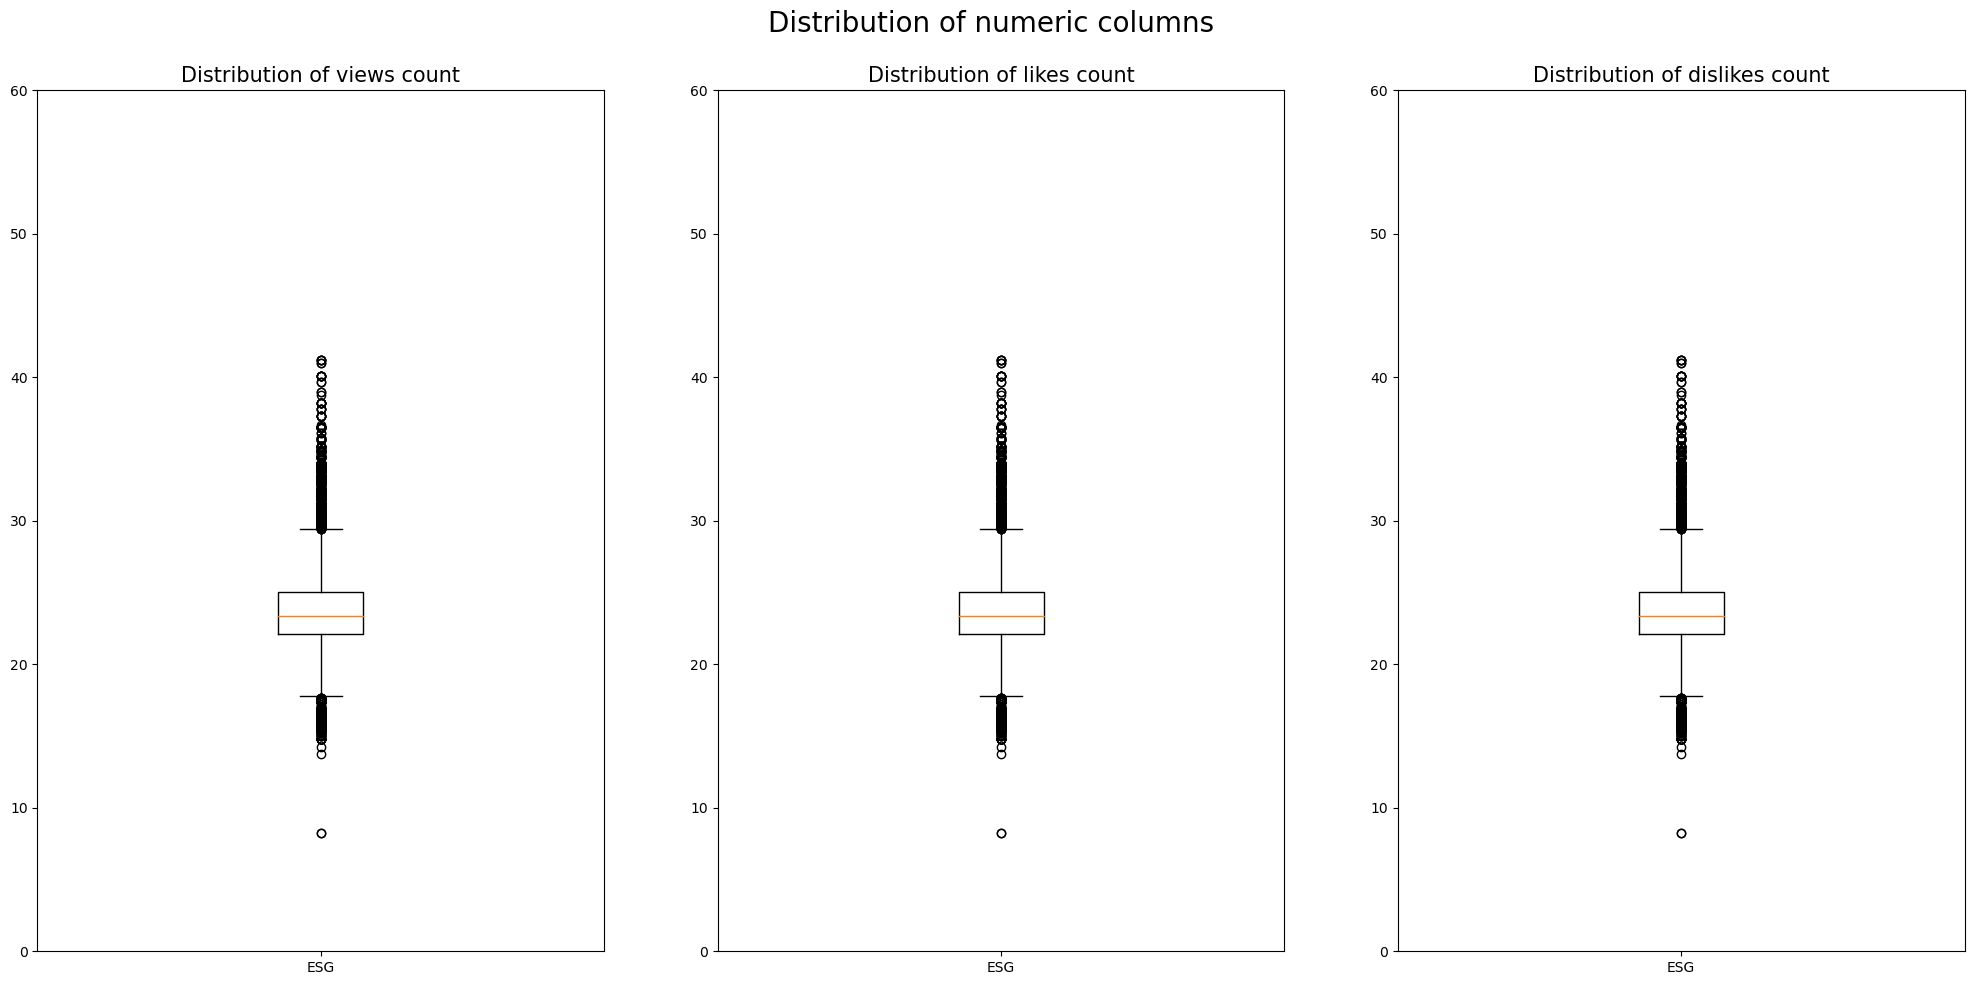

In [27]:
fig, ax = plt.subplots(1,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0].boxplot(x = leader['esg_score']) # creates boxplot for number of views
ax[0].set_xticklabels(labels=["ESG"]) # sets the label for the ticks on the x-axis
ax[0].set_ylim(0,60) # limits the y-axis values from 0 to 2000000 
ax[0].set_title("Distribution of views count", fontsize = 15); # sets title for subplot

ax[1].boxplot(x = average['esg_score'])
ax[1].set_xticklabels(labels=["ESG"])
ax[1].set_ylim(0,60)
ax[1].set_title("Distribution of likes count", fontsize = 15);

ax[2].boxplot(x = laggard['esg_score'])
ax[2].set_xticklabels(labels=["ESG"])
ax[2].set_ylim(0,60)
ax[2].set_title("Distribution of dislikes count", fontsize = 15);

AttributeError: 'numpy.ndarray' object has no attribute 'bar'

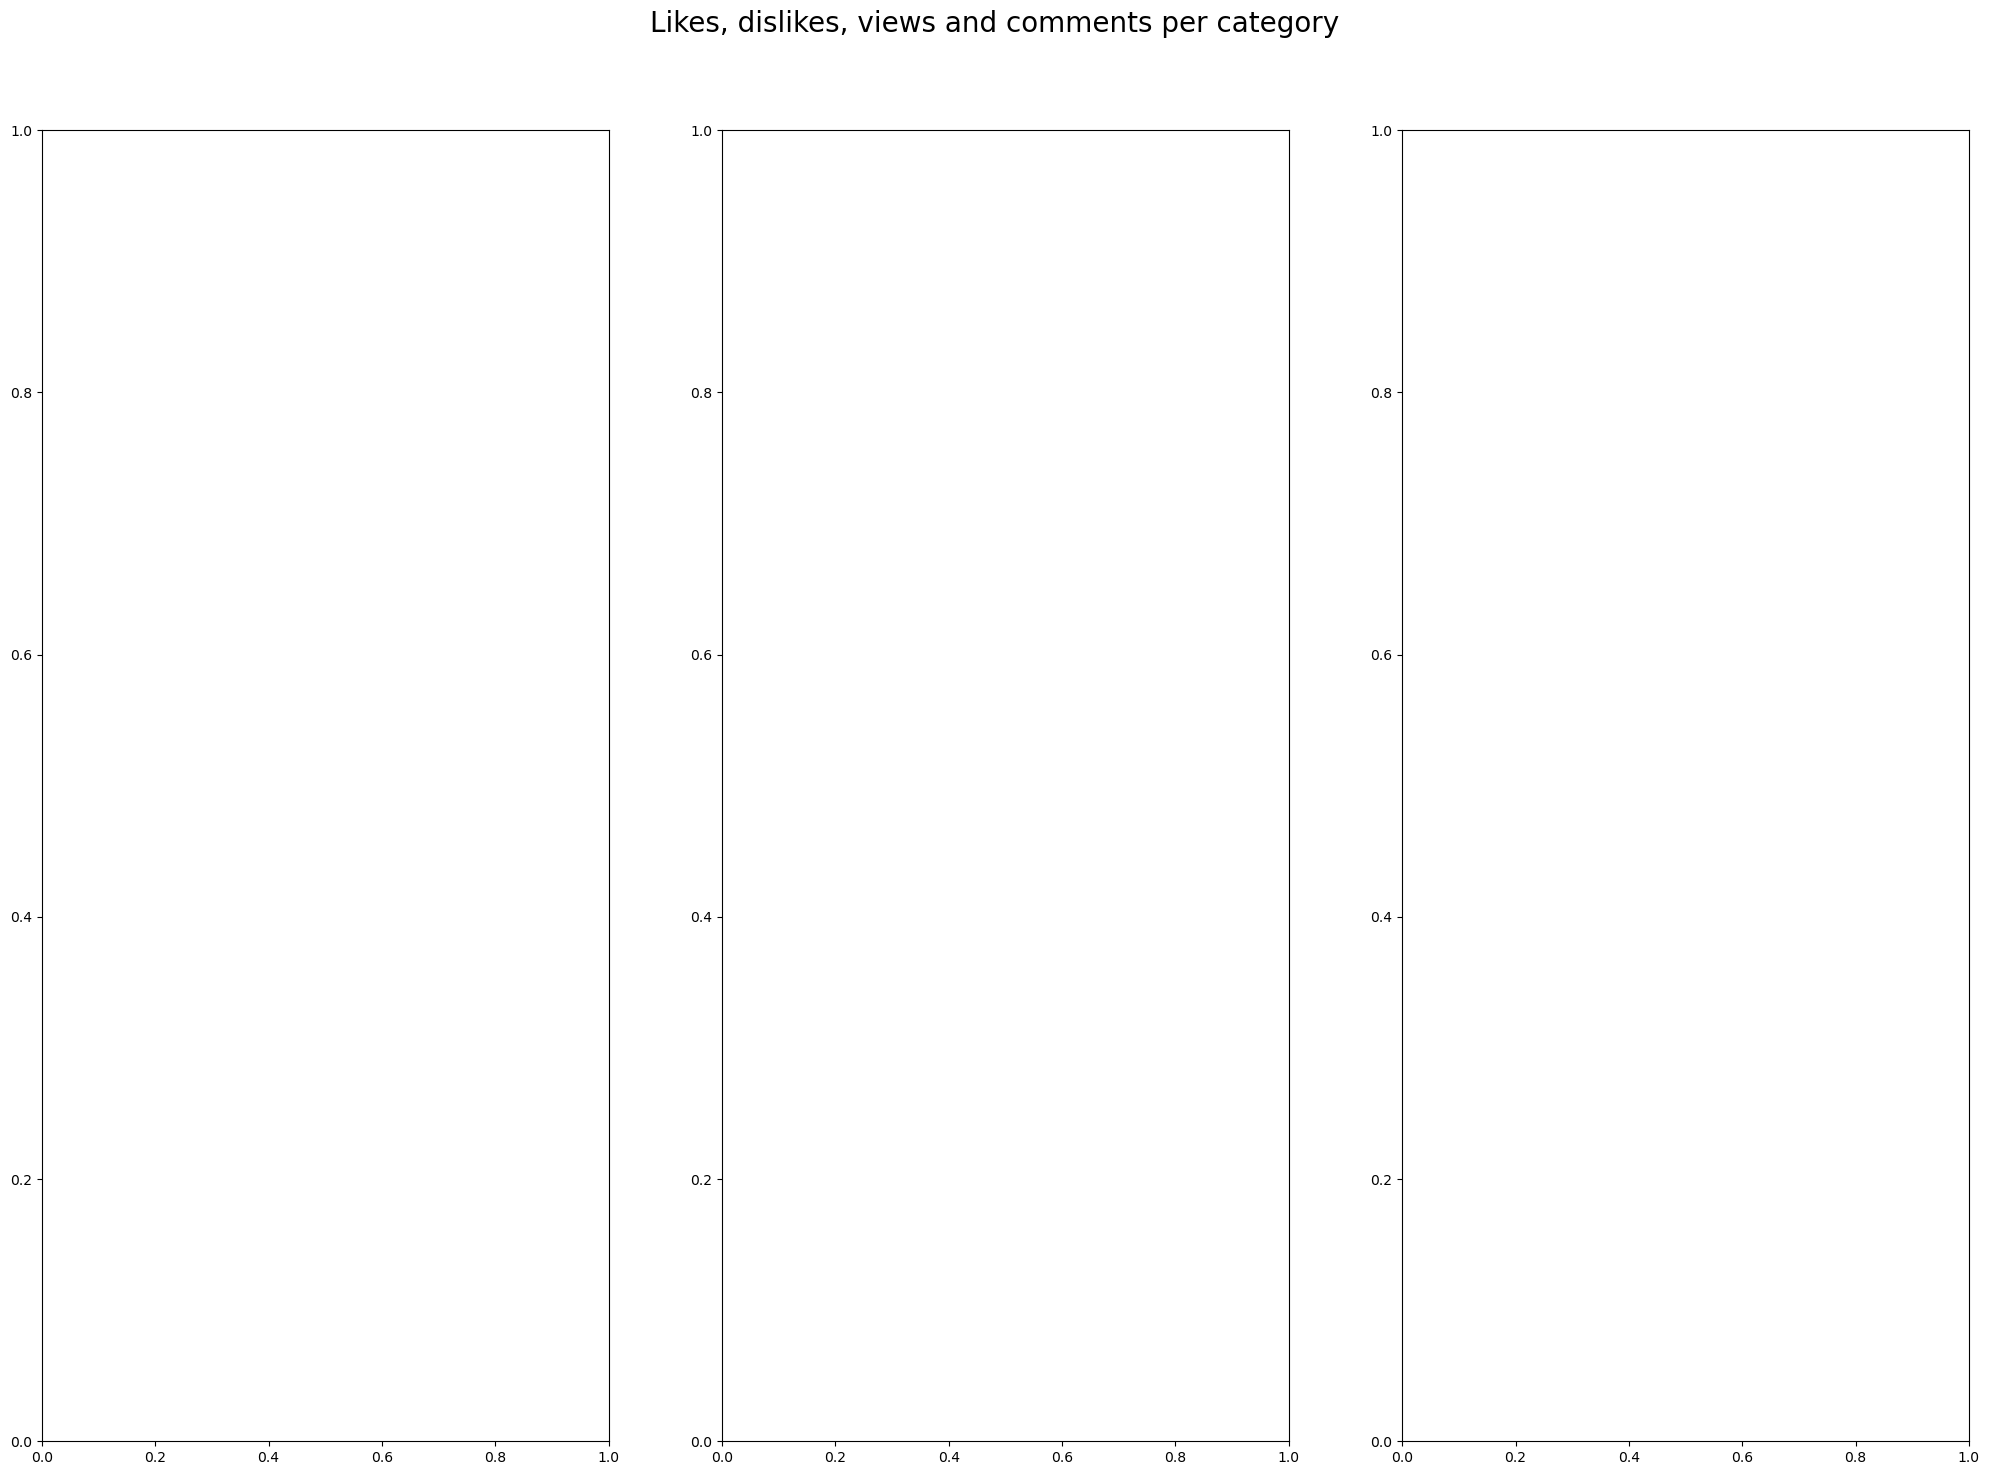

In [29]:
fig, ax = plt.subplots(1,3, figsize=(20,15)) # create subplots on 2 rows and 2 columns
plt.suptitle('Likes, dislikes, views and comments per category', fontsize=20) 
fig.tight_layout()   # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .6, wspace = .2, top = .9) # adjusts the space between the single subplots

f1 = sns.barplot(x=leader["size_type"], y = leader['esg_score'], ax=ax) # creates barchart for number of views
f1.tick_params(axis='x', labelrotation=90) # sets the label y-axis
f1.set(xlabel=None) # sets the x-axis label
f1.set_ylabel("Number of views", fontsize = 10) # limits the x-axis values from 0 to 1000000
f1.set_title("Views per category", fontsize = 15);  # sets title for subplot

f2= sns.barplot(x=average["size_type"], y = average['esg_score'], ax=ax)
f2.tick_params(axis='x', labelrotation=90)
f2.set(xlabel=None)
f2.set_ylabel("Number of likes", fontsize = 10)
f2.set_title("Likes per category", fontsize = 15);

f3 = sns.barplot(x=laggard["size_type"], y = laggard['esg_score'], ax=ax)
f3.tick_params(axis='x', labelrotation=90)
f3.set(xlabel=None)
f3.set_ylabel("Number of dislikes", fontsize = 10)
f3.set_title("Dislikes per category", fontsize = 15);

In [7]:
nw_df = sf.get_dataframe(f'SELECT fund_symbol, fund_long_name, esg_score FROM {schema}."mutual_funds_subset" WHERE esg_score IS NOT NULL ORDER BY esg_score DESC LIMIT 20')


In [8]:
nw_df.groupby('')

,fund_symbol,fund_long_name,esg_score
0,RGNCX,Water Island Event-Driven Fund Class A,41.21
1,RSNKX,Appleseed Fund Investor Share,41.21
2,RSNRX,AB Conservative Wealth Strategy Class R,41.21
3,RSNYX,AAM/Phocas Real Estate Fund Class A Shares,41.21
4,GRHAX,Adaptive Tactical Outlook Fund C Class,40.97
5,GRHIX,Columbia Global Technology Growth Fund Institu...,40.97
6,OSPMX,BNY Mellon Active MidCap Fund - Class A,40.05
7,MLPDX,MFS Blended Research Mid Cap Equity Fund R1,40.05
8,SPNNX,BlackRock SMID-Cap Growth Equity Fund Class K,40.05
9,MLPZX,Meeder Tactical Income Fund Adviser Class,40.05


In [9]:
# define a new coloumn called esg_ranking based on esg_score column and sort values in descending order---method min
nw_df['esg_ranking']=nw_df['esg_score'].rank(ascending=False, method='min')
# # show me the output of esg_ranking column and esg_score column and fund_symbol column in descending order-- 
# nw_df[['esg_ranking','esg_score','fund_symbol']].sort_values(by='esg_ranking',ascending=True).head(30)

In [10]:
nw_df

,fund_symbol,fund_long_name,esg_score,esg_ranking
0,RGNCX,Water Island Event-Driven Fund Class A,41.21,1.0
1,RSNKX,Appleseed Fund Investor Share,41.21,1.0
2,RSNRX,AB Conservative Wealth Strategy Class R,41.21,1.0
3,RSNYX,AAM/Phocas Real Estate Fund Class A Shares,41.21,1.0
4,GRHAX,Adaptive Tactical Outlook Fund C Class,40.97,5.0
5,GRHIX,Columbia Global Technology Growth Fund Institu...,40.97,5.0
6,OSPMX,BNY Mellon Active MidCap Fund - Class A,40.05,7.0
7,MLPDX,MFS Blended Research Mid Cap Equity Fund R1,40.05,7.0
8,SPNNX,BlackRock SMID-Cap Growth Equity Fund Class K,40.05,7.0
9,MLPZX,Meeder Tactical Income Fund Adviser Class,40.05,7.0


In [1]:
# Plot number of videos per category
plt.figure(figsize=(15,8)) # specify figure size
f1 = sns.countplot(x=df['category_name']) # create countplot
f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
f1.set(xlabel=None) # set no label for x-axis 
f1.set_ylabel("No of videos", fontsize = 10); # set label for y-axis
f1.set_title('Number of videos per category', fontsize=20); # set title

NameError: name 'plt' is not defined

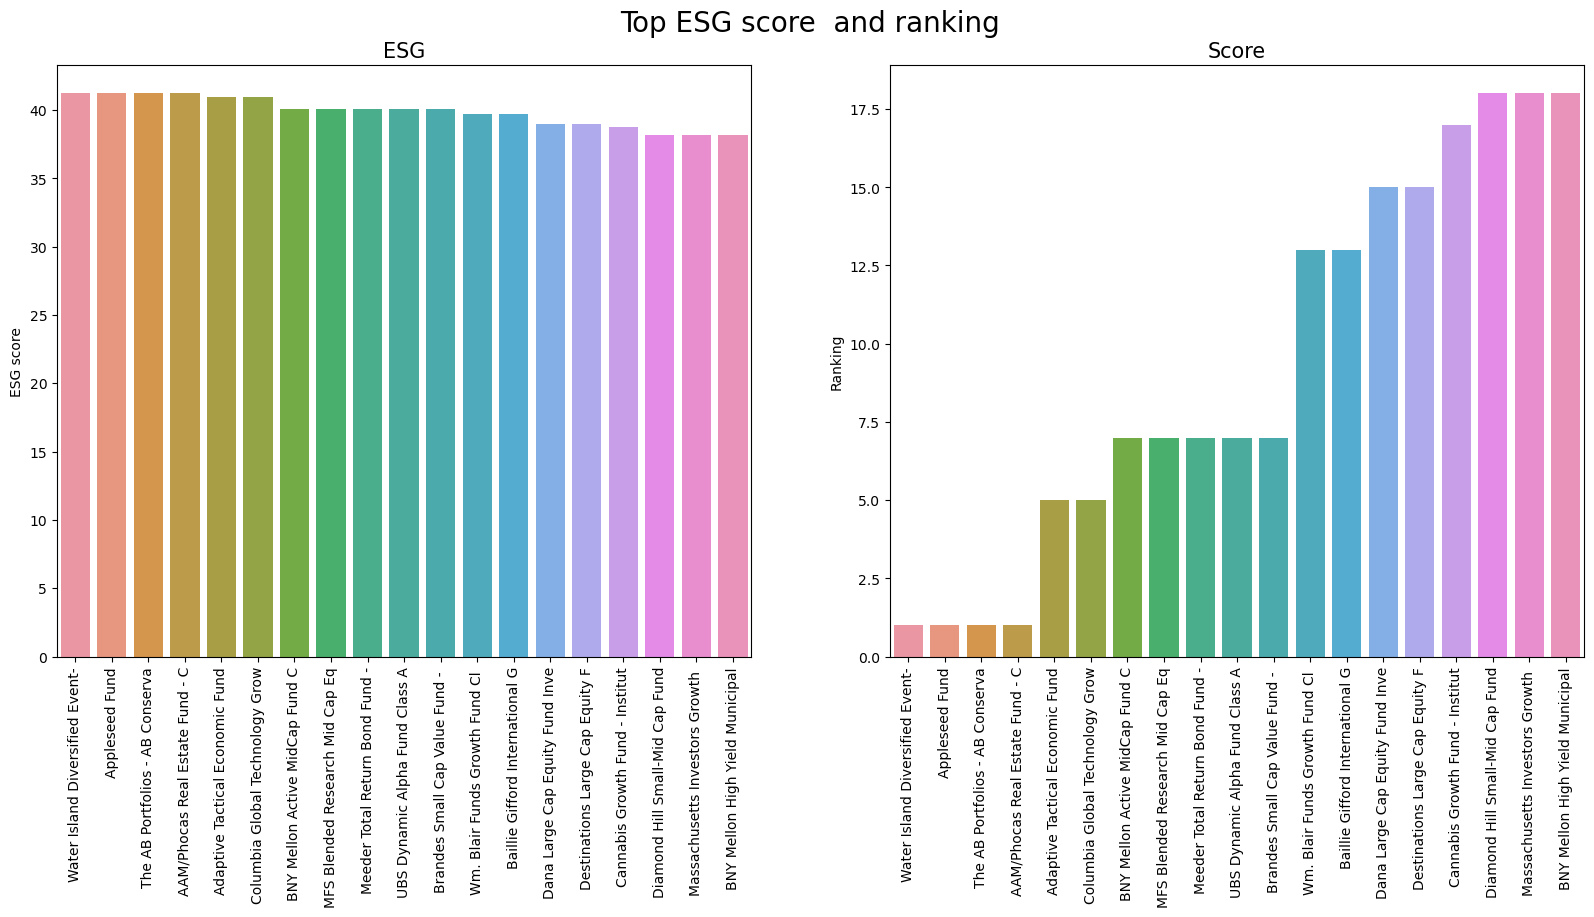

In [60]:
fig, ax = plt.subplots(1,2, figsize=(16,7)) # create subplots on 2 rows and 2 columns
plt.suptitle('Top ESG score  and ranking', fontsize=20) 
fig.tight_layout()   # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .6, wspace = .2, top = .9) # adjusts the space between the single subplots

f1 = sns.barplot(x=nw_df["fund_short_name"], y = nw_df['esg_score'], ax=ax[0]) # creates barchart for number of views
f1.tick_params(axis='x', labelrotation=90) # sets the label y-axis
f1.set(xlabel=None) # sets the x-axis label
f1.set_ylabel("ESG score", fontsize = 10) # limits the x-axis values from 0 to 1000000
f1.set_title("ESG", fontsize = 15);  # sets title for subplot

f2= sns.barplot(x=nw_df["fund_short_name"], y = nw_df['esg_ranking'], ax=ax[1])
f2.tick_params(axis='x', labelrotation=90)
f2.set(xlabel=None)
f2.set_ylabel("Ranking", fontsize = 10)
f2.set_title("Score", fontsize = 15);

# fig.delaxes(ax[0][2]);